# Exploration of pyOTR

Basic import modules:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Running pyOTR:

Let's run the main pyOTR module:

In [2]:
%run pyOTR.py

2020, Jan 24 16:31:53
Starting pyOTR:
Tracing 100,000 rays!
Generating 100,000 rays at random positions in a 25x25 square!
GenerateRays ran in 0.62 s
Dividing the data into 100 chuncks
PrepareData ran in 0.01 s
Running data chunck: 0
TransportRays ran in 3.04 s
Ending pyOTR, bye!!
2020, Jan 24 16:31:56


We can see that by default, it generates 100,000 rays and it only takes ~3 s to do so.    

It simulated photons at random positions in x and y, but at z = -1 mm,
whereas a Calibration foil lies at z = 0,  perpendicular to the direction of propagation of these photons.

# The Calibration Foil:

The simulated calibration foil has 30 holes in total, 29 of them distributed on a uniform grid.    
The outmost holes lie 21 mm away from the foil center and the total foil radius is 25 mm.     
There is also an offset hole that lies close to the center that breaks the symmetry of the grid.    
This is very helpful when analysis OTR images to define the image orientation with respect to the foil.

All holes have a diameter d = 1.2 mm except the center and the offset holes (d = 0.8 mm).    
The distance between the holes is 7 mm, except the offset hole that lies $2.8\sqrt(2) \approx 4$ mm from the center as can be seen in the figure below:

![title](macros/figs/Npoints.png)

If our simulation is working as expected, we 

# Drawing Functions:

Definition of some drawing functions to visualize the photon distributions.    
MakeHist helps to seethe uniformity of the distribution, while 
MakeScatter is a simple scatter plot.

In [3]:
def MakeHist(x, y, xmax=26., title='', save='test', show=False):
    binsx = np.arange(-xmax, xmax, 0.25)
    binsy = np.arange(-xmax, xmax, 0.25)
    fig, ax = plt.subplots(1, 1, figsize=(8.5, 7))
    *_, a = ax.hist2d(x, y, bins=[binsx, binsy], cmap='rainbow')
    ax.set_title(title, size=20)
    ax.set_xlabel('X (mm)', size=15)
    ax.set_ylabel('Y (mm)', size=15)
    cbar = fig.colorbar(a, ax=ax)
    cbar.set_label('# of Photons', size=15)
    #plt.savefig(f'{save}.png')
    if show:
        plt.show()

In [4]:
def MakeScatter(x, y, xmax=26., title='', save='test', show=False):
    fig, ax = plt.subplots(1, 1, figsize=(8.5, 7))
    ax.scatter(x, y, c='#00dfff', marker='.', alpha=1)
    ax.set_title(title, size=20)
    ax.set_xlabel('X (mm)', size=15)
    ax.set_ylabel('Y (mm)', size=15)
    #plt.savefig(f'{save}.png')
    if show:
        plt.show()

## Loading the data:

The code writes the output of the simulation in the "output" folder and saved it as numpy arrays, let's load those to see what they look like:

In [5]:
def LoadData(name):
    X0 = np.load(f'{name}_Xinitial.npy').T
    V0 = np.load(f'{name}_Vinitial.npy').T
    X = np.load(f'{name}_Xfinal.npy').T
    V = np.load(f'{name}_Vfinal.npy').T

    Xf, Xr = [], []
    for x, v in zip(X, V):
        if v[2] > 0:
            Xf.append((x[0], x[1]))
        else:
            Xr.append((x[0], x[1]))
    Xf = np.array(Xf).T
    Xr = np.array(Xr).T

    return X0, Xr, Xf

In [6]:
# I have ran pyOTR before with 1M photons and saved the output in the format below.
# To get the result obtained from running pyOTR from above, the default name would be 'output/test'
name = 'output/1M'
Xs = LoadData(name)

In [7]:
titles = [
        'Initial Photon Distribution',
        'Reflected Photon Distribution',
        'Passed Photon Distribution'
]

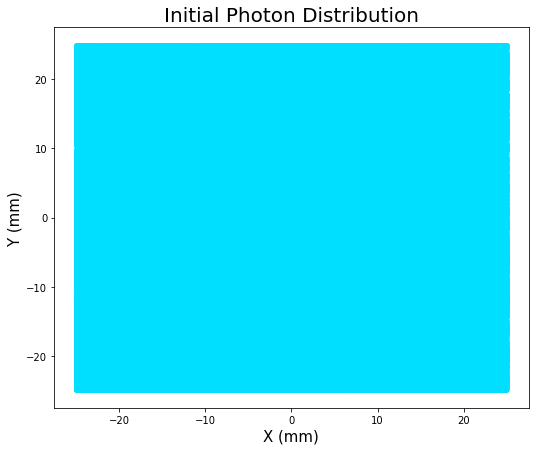

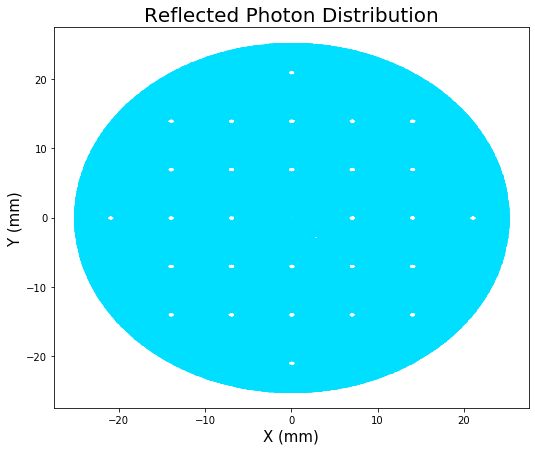

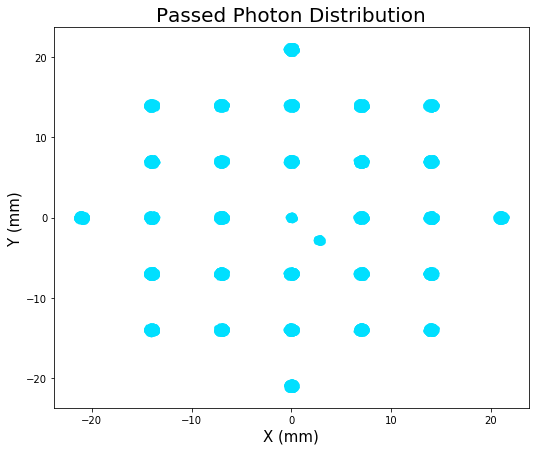

In [8]:
for title, x in zip(titles, Xs):
    MakeScatter(x[0], x[1], xmax=26., title=title, show=True)

Let's look at 2D histograms also to make sure the distributions continue to be uniform and nothing funky is happening when propagating the photons:

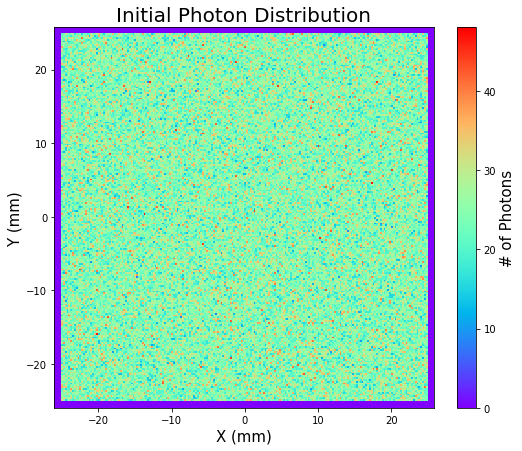

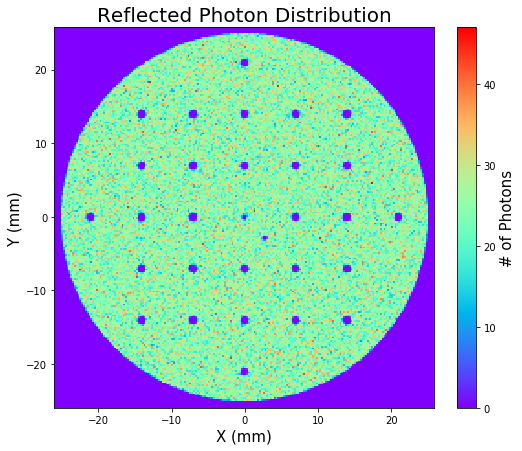

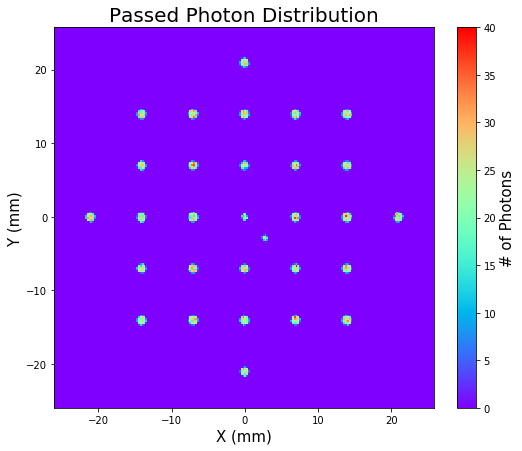

In [9]:
for title, x in zip(titles, Xs):
    MakeHist(x[0], x[1], xmax=26., title=title, show=True)

We can see that the code is working as expected!

Photons were uniformly created in a 25 mm square grid in the direction of the foil.

The "Reflected Photons" and "Passed Photons" distributions clearly show the expected hole pattern of the Calibration Foil!

In [10]:
name = 'output/1Minv'
Xs = LoadData(name)

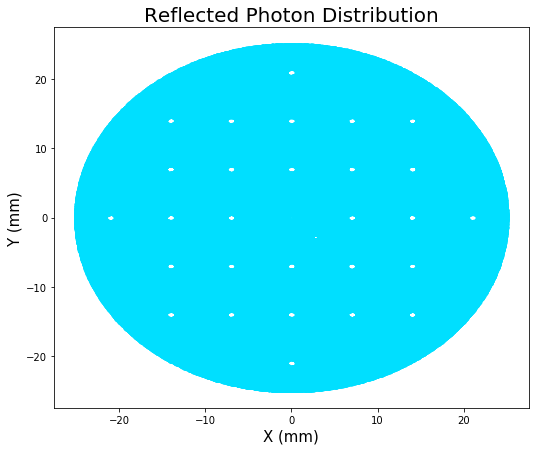

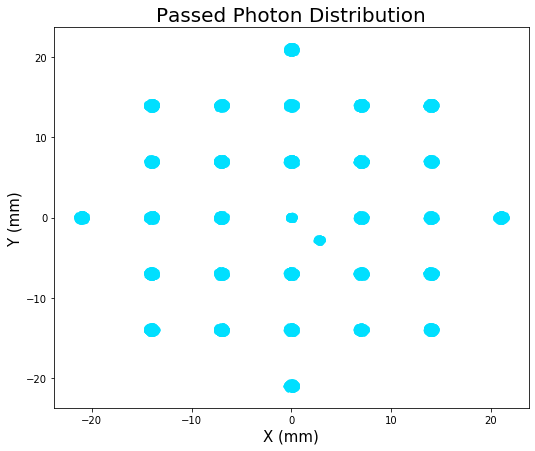

In [11]:
for title, x in zip(titles[1:], Xs[1:]):
    MakeScatter(x[0], x[1], xmax=26., title=title, show=True)